In [1]:
import os
print(os.listdir("../src/churn"))

['eda.py', 'evaluate.py', 'random_forest_experiments.py', 'run_experiments.py', 'train_random_forest.py', 'train_xgboost.py', 'utils.py', '__init__.py', '__pycache__']


In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Exploratory Analysis

In [40]:
import warnings; warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np
import sys, os
sys.path.append(os.path.abspath("../src")) 

from churn.eda import set_plot_theme, plot_missing_values, plot_distribution, \
                      plot_categoricals_by_target, plot_numerical_box, plot_pairs, \
                      plot_correlation_heatmap

In [41]:
colors = set_plot_theme()

In [34]:
DATA_PATH = "../data/Train.csv"
TARGET = "CHURN"

df = pd.read_csv(DATA_PATH)

### A general data overview

In [6]:
df.head(3)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0


In [7]:
df.shape

(2154048, 19)

In [8]:
df.dtypes.astype(str).to_dict()

{'user_id': 'object',
 'REGION': 'object',
 'TENURE': 'object',
 'MONTANT': 'float64',
 'FREQUENCE_RECH': 'float64',
 'REVENUE': 'float64',
 'ARPU_SEGMENT': 'float64',
 'FREQUENCE': 'float64',
 'DATA_VOLUME': 'float64',
 'ON_NET': 'float64',
 'ORANGE': 'float64',
 'TIGO': 'float64',
 'ZONE1': 'float64',
 'ZONE2': 'float64',
 'MRG': 'object',
 'REGULARITY': 'int64',
 'TOP_PACK': 'object',
 'FREQ_TOP_PACK': 'float64',
 'CHURN': 'int64'}

In [9]:
df['TOP_PACK'].value_counts()

TOP_PACK
All-net 500F=2000F;5d             317802
On net 200F=Unlimited _call24H    152295
Data:490F=1GB,7d                  115180
Data: 100 F=40MB,24H               84649
Mixt 250F=Unlimited_call24H        67512
                                   ...  
CVM_150F_unlimited                     1
YMGX on-net 100=700F, 24H              1
Postpaid FORFAIT 10H Package           1
pilot_offer5                           1
Package3_Monthly                       1
Name: count, Length: 140, dtype: int64

In [10]:
df.nunique().to_dict()

{'user_id': 2154048,
 'REGION': 14,
 'TENURE': 8,
 'MONTANT': 6540,
 'FREQUENCE_RECH': 123,
 'REVENUE': 38114,
 'ARPU_SEGMENT': 16535,
 'FREQUENCE': 91,
 'DATA_VOLUME': 41550,
 'ON_NET': 9884,
 'ORANGE': 3167,
 'TIGO': 1315,
 'ZONE1': 612,
 'ZONE2': 486,
 'MRG': 1,
 'REGULARITY': 62,
 'TOP_PACK': 140,
 'FREQ_TOP_PACK': 245,
 'CHURN': 2}

In [11]:
df.describe(include="all")

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
count,2154048,1304749,2154048,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2154048,2.154048e+06,1251454,1.251454e+06,2.154048e+06
unique,2154048,14,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,140,NaN,NaN
top,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,All-net 500F=2000F;5d,NaN,NaN
freq,1,513271,2043201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2154048,NaN,317802,NaN,NaN
mean,NaN,NaN,NaN,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,NaN,2.804251e+01,NaN,9.272461e+00,1.875474e-01
std,NaN,NaN,NaN,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,NaN,2.228686e+01,NaN,1.228044e+01,3.903504e-01
min,NaN,NaN,NaN,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,NaN,1.000000e+00,NaN,1.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,NaN,6.000000e+00,NaN,2.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,NaN,2.400000e+01,NaN,5.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,NaN,5.100000e+01,NaN,1.200000e+01,0.000000e+00


### Check missing values

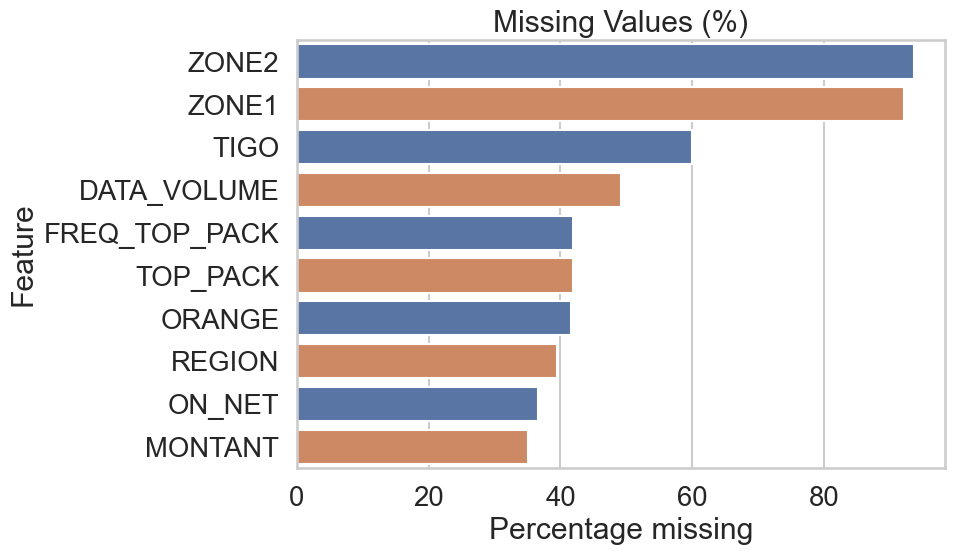

In [35]:
plot_missing_values(df, top_k=10, colors=colors)

In [13]:
(df.isnull().mean()*100).round(2).to_dict()

{'user_id': 0.0,
 'REGION': 39.43,
 'TENURE': 0.0,
 'MONTANT': 35.13,
 'FREQUENCE_RECH': 35.13,
 'REVENUE': 33.71,
 'ARPU_SEGMENT': 33.71,
 'FREQUENCE': 33.71,
 'DATA_VOLUME': 49.23,
 'ON_NET': 36.52,
 'ORANGE': 41.56,
 'TIGO': 59.89,
 'ZONE1': 92.12,
 'ZONE2': 93.65,
 'MRG': 0.0,
 'REGULARITY': 0.0,
 'TOP_PACK': 41.9,
 'FREQ_TOP_PACK': 41.9,
 'CHURN': 0.0}

Several features contain a huge of missing data. Notably:
- ``ZONE1`` (92.12%) and ``ZONE2`` (93.65%) have high missingness, making them unreliable for predictive modeling.
- ``TIGO`` (60%), ``REGION`` (39%), ``ORANGE`` (41.56%), ``TOP_PACK`` (42%), and ``FREQ_TOP_PACK`` (42%) also have moderate missing values, which will require careful imputation or alternative handling.
- Other features, such as ``MONTANT``, ``FREQUENCE_RECH``, ``REVENUE``, ``ARPU_SEGMENT``, ``FREQUENCE``, ``DATA_VOLUME``, ``ON_NET``, have between 33% and 49% missing values, which may still be informative if handled correctly.
- No missing values for ``user_id``, ``TENURE``, ``MRG``, ``REGULARITY``, ``CHURN``.

### Target variable ['``CHURN``']

In [14]:
df['CHURN'].value_counts() # Check the distribution of the target variable

CHURN
0    1750062
1     403986
Name: count, dtype: int64

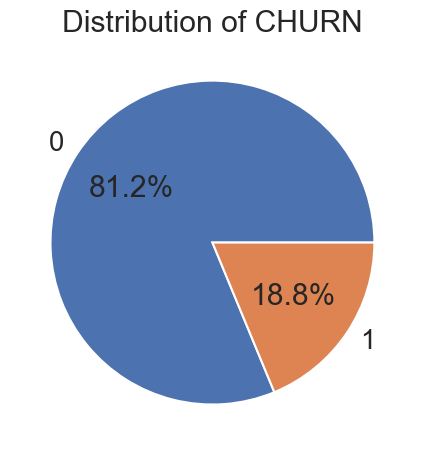

In [36]:
plot_distribution(df, TARGET, use_pie=True, colors=colors)

The dataset is imbalanced.

### Explore categorical variables

In [42]:
categroical = ['REGION', 'TENURE', 'MRG', 'TOP_PACK']
plot_categoricals_by_target(df, TARGET, categroical, colors=colors)

No valid categorical columns to plot.


``MRG`` feature, all its values are 'NO'.

## Explore numeric variables

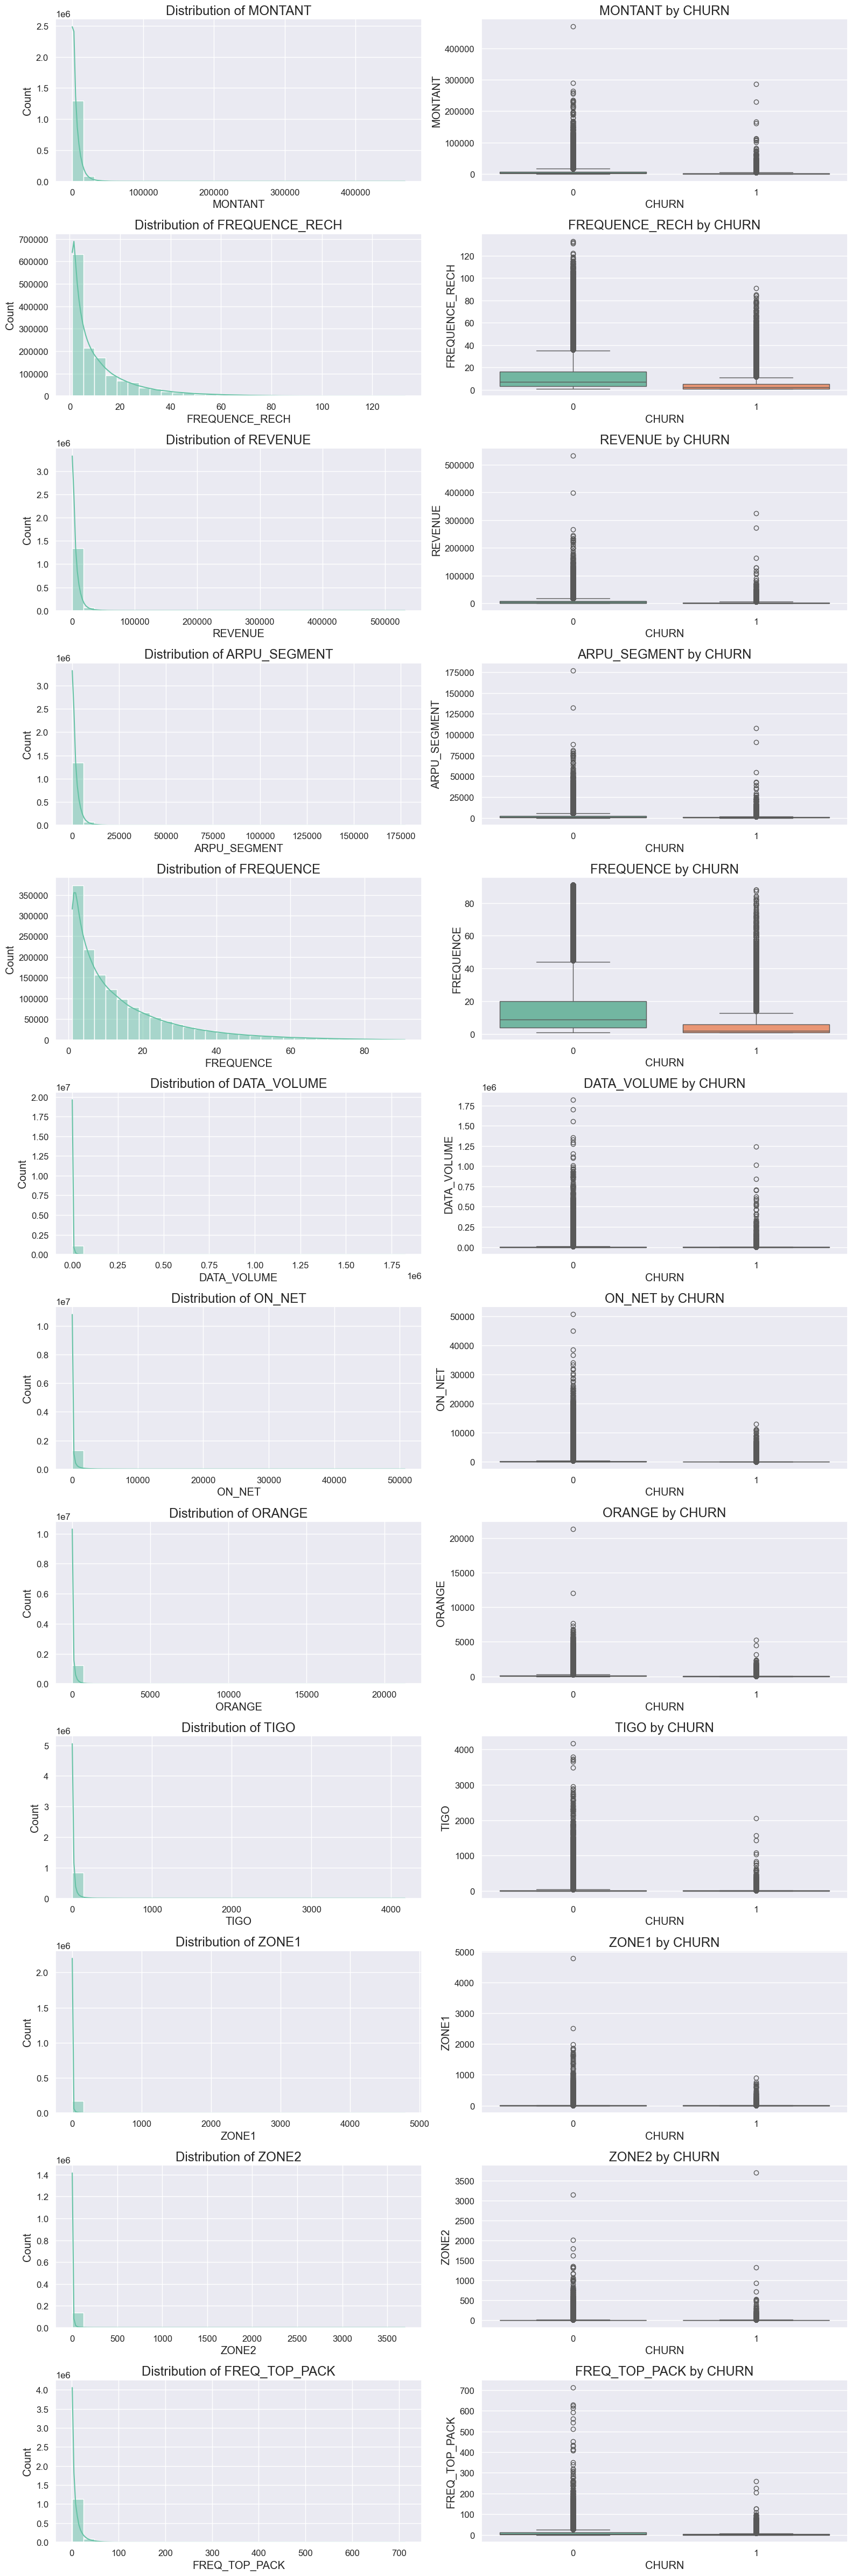

In [18]:
num_features = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT','FREQUENCE', 
                'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO','ZONE1', 'ZONE2', 'FREQ_TOP_PACK']

plot_numerical_box(df, TARGET, num_features, colors)

### Pairwise scatterplots

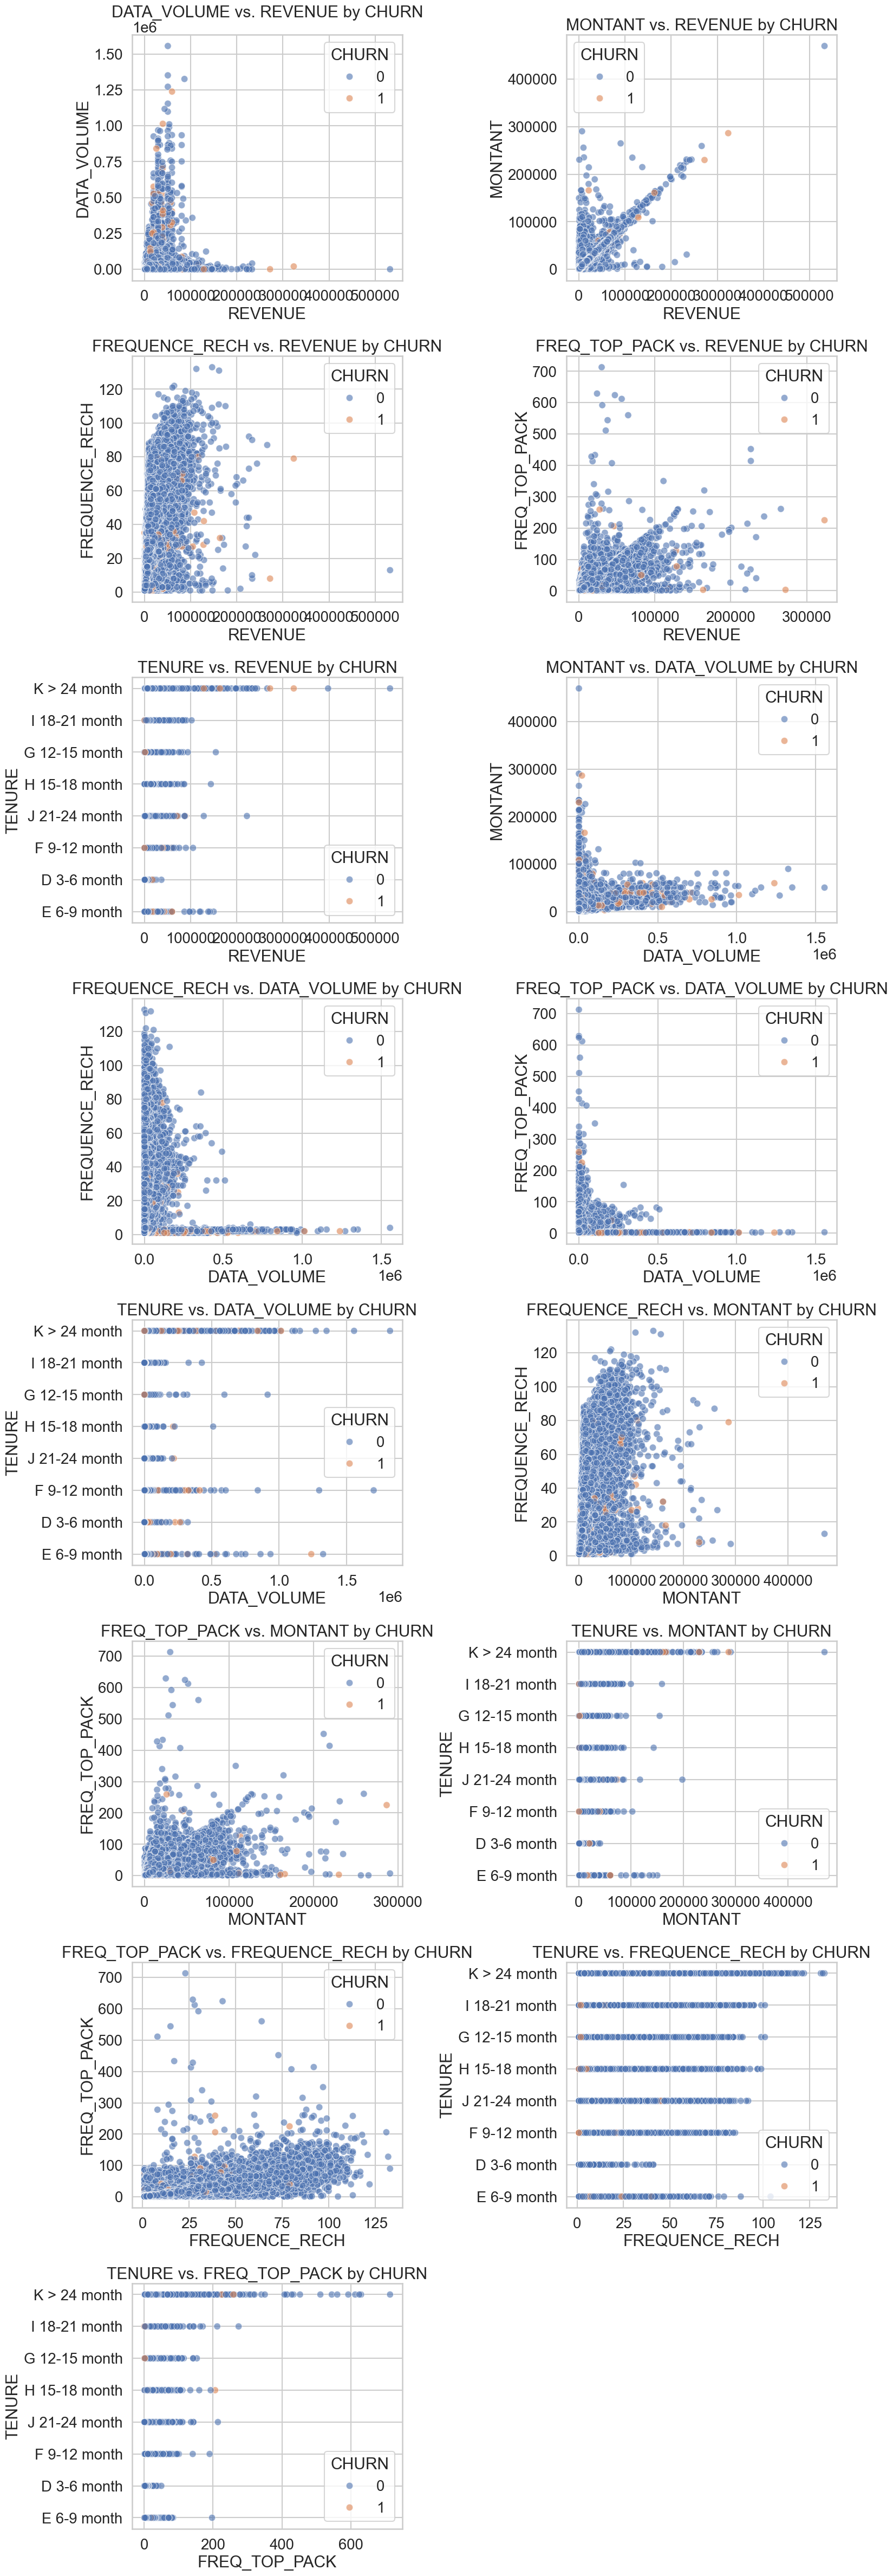

In [43]:
key_features = ['REVENUE', 'DATA_VOLUME', 'MONTANT', 'FREQUENCE_RECH', 'FREQ_TOP_PACK', 'TENURE']

plot_pairs(df, TARGET, key_features)

## Correlation heatmap

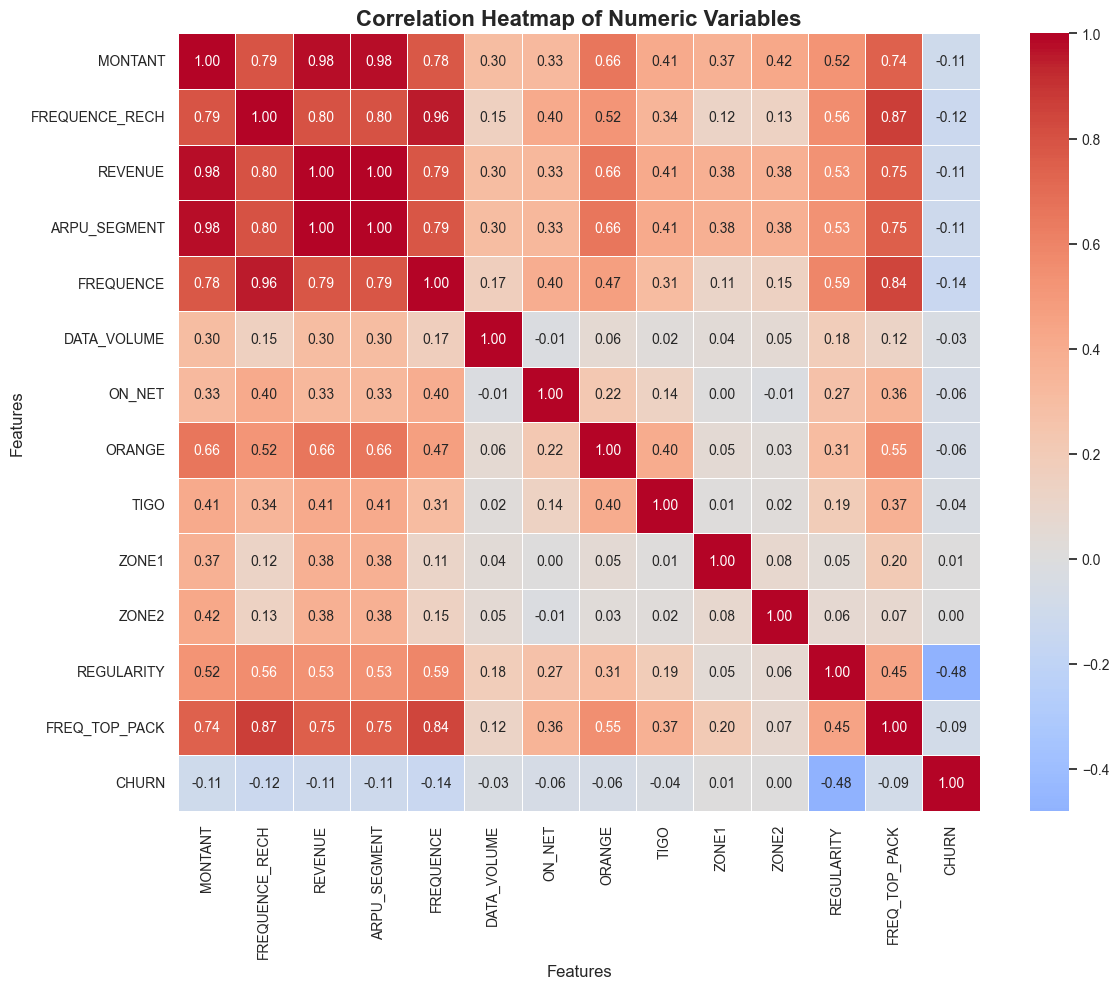

In [ ]:
plot_correlation_heatmap(df)